## **Prediksi Risiko Diabetes Tahap Awal**

# Sumber Dataset

https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

Dataset berisi 520 entri dengan 17 kolom.

* Target: class (Positive / Negative → status diabetes).

**Fitur terdiri dari:**

* Numerik: usia

* Kategori (Ya/Tidak): gejala seperti Polyuria, Polydipsia, dll.


**Gejala Klinis (14 fitur, semuanya Kategorikal Biner: Ya/Tidak):**

* **Polyuria (Sering Buang Air Kecil):** Peningkatan frekuensi/volume buang air kecil.
* **Polydipsia (Sering Haus):** Rasa haus berlebihan.
* **Sudden Weight Loss (Penurunan Berat Badan Mendadak):** Penurunan berat badan tidak disengaja dan signifikan.
* **Weakness (Kelemahan):** Rasa lelah dan kurang energi.
* **Polyphagia (Nafsu Makan Meningkat):** Peningkatan nafsu makan tidak biasa.
* **Genital Thrush (Sariawan Genital):** Infeksi jamur pada area genital.
* **Visual Blurring (Penglihatan Kabur):** Penglihatan yang menjadi kabur.
* **Itching (Gatal-gatal):** Rasa gatal pada kulit.
* **Irritability (Mudah Tersinggung):** Perubahan suasana hati.
* **Delayed Healing (Penyembuhan Luka Lambat):** Luka sulit sembuh.
* **Partial Paresis (Kelumpuhan Parsial):** Kelemahan sebagian otot.
* **Muscle Stiffness (Kekakuan Otot):** Otot terasa kaku atau nyeri.
* **Alopecia (Kerontokan Rambut):** Kerontokan rambut.
* **Obesity (Obesitas):** Kondisi berat badan berlebih; faktor risiko utama diabetes Tipe 2.

# Data Understanding

In [20]:
!pip install ucimlrepo

In [21]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# data (as pandas dataframes)
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

# metadata
print(early_stage_diabetes_risk_prediction.metadata)

# variable information
print(early_stage_diabetes_risk_prediction.variables)



{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

In [22]:
import pandas as pd

# Gabungkan fitur dan target
df = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df))
print("Visualisasi dataset breastcancer")
print(df.to_string(index=False))

Total baris dataset ini adalah = 520
Visualisasi dataset breastcancer
 age gender polyuria polydipsia sudden_weight_loss weakness polyphagia genital_thrush visual_blurring itching irritability delayed_healing partial_paresis muscle_stiffness alopecia obesity    class
  40   Male       No        Yes                 No      Yes         No             No              No     Yes           No             Yes              No              Yes      Yes     Yes Positive
  58   Male       No         No                 No      Yes         No             No             Yes      No           No              No             Yes               No      Yes      No Positive
  41   Male      Yes         No                 No      Yes        Yes             No              No     Yes           No             Yes              No              Yes      Yes      No Positive
  45   Male       No         No                Yes      Yes        Yes            Yes              No     Yes           No             Yes

In [23]:
# Simpan ke file CSV
df.to_csv('datasetdiabetes.csv', index=False)

# prepocessing

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class       

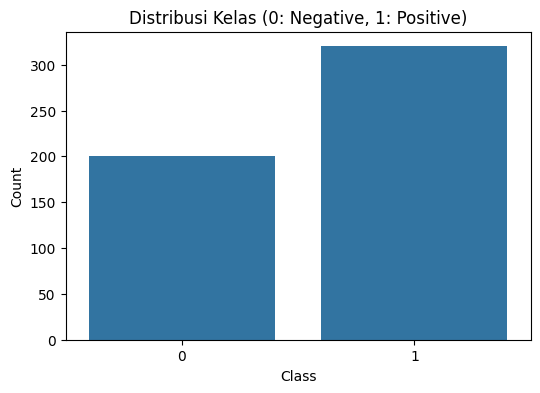


Ukuran Data Train: (416, 16)
Ukuran Data Test: (104, 16)


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Membaca dataset
data = pd.read_csv('datasetdiabetes.csv')

# 2. Pemeriksaan data awal
print("Info Dataset:")
print(data.info())
print("\n5 Baris Pertama:")
print(data.head())

# 3. Pemeriksaan missing values
print("\nMissing Values:")
print(data.isnull().sum())

# 4. Encoding fitur kategorikal
# Kolom 'Gender' dan 'class' akan diencode dengan LabelEncoder
# Kolom Yes/No akan diencode menjadi 1/0
le = LabelEncoder()

# Encoding kolom 'Gender' (Male/Female -> 0/1)
data['gender'] = le.fit_transform(data['gender'])

# Encoding kolom 'class' (Positive/Negative -> 1/0)
data['class'] = le.fit_transform(data['class'])

# Encoding kolom Yes/No
yes_no_columns = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
                  'genital_thrush', 'visual_blurring', 'itching', 'irritability',
                  'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
for col in yes_no_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# 5. Memisahkan fitur dan target
X = data.drop('class', axis=1)  # Fitur
y = data['class']  # Target

# 6. Normalisasi fitur numerik (Age)
scaler = StandardScaler()
X['age'] = scaler.fit_transform(X[['age']])

# 7. Pemeriksaan keseimbangan kelas
print("\nDistribusi Kelas:")
print(y.value_counts(normalize=True))

# Visualisasi distribusi kelas
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribusi Kelas (0: Negative, 1: Positive)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 8. Pemisahan data menjadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 9. Menampilkan ukuran data train dan test
print("\nUkuran Data Train:", X_train.shape)
print("Ukuran Data Test:", X_test.shape)

# Modelling

Akurasi: 0.9807692307692307

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



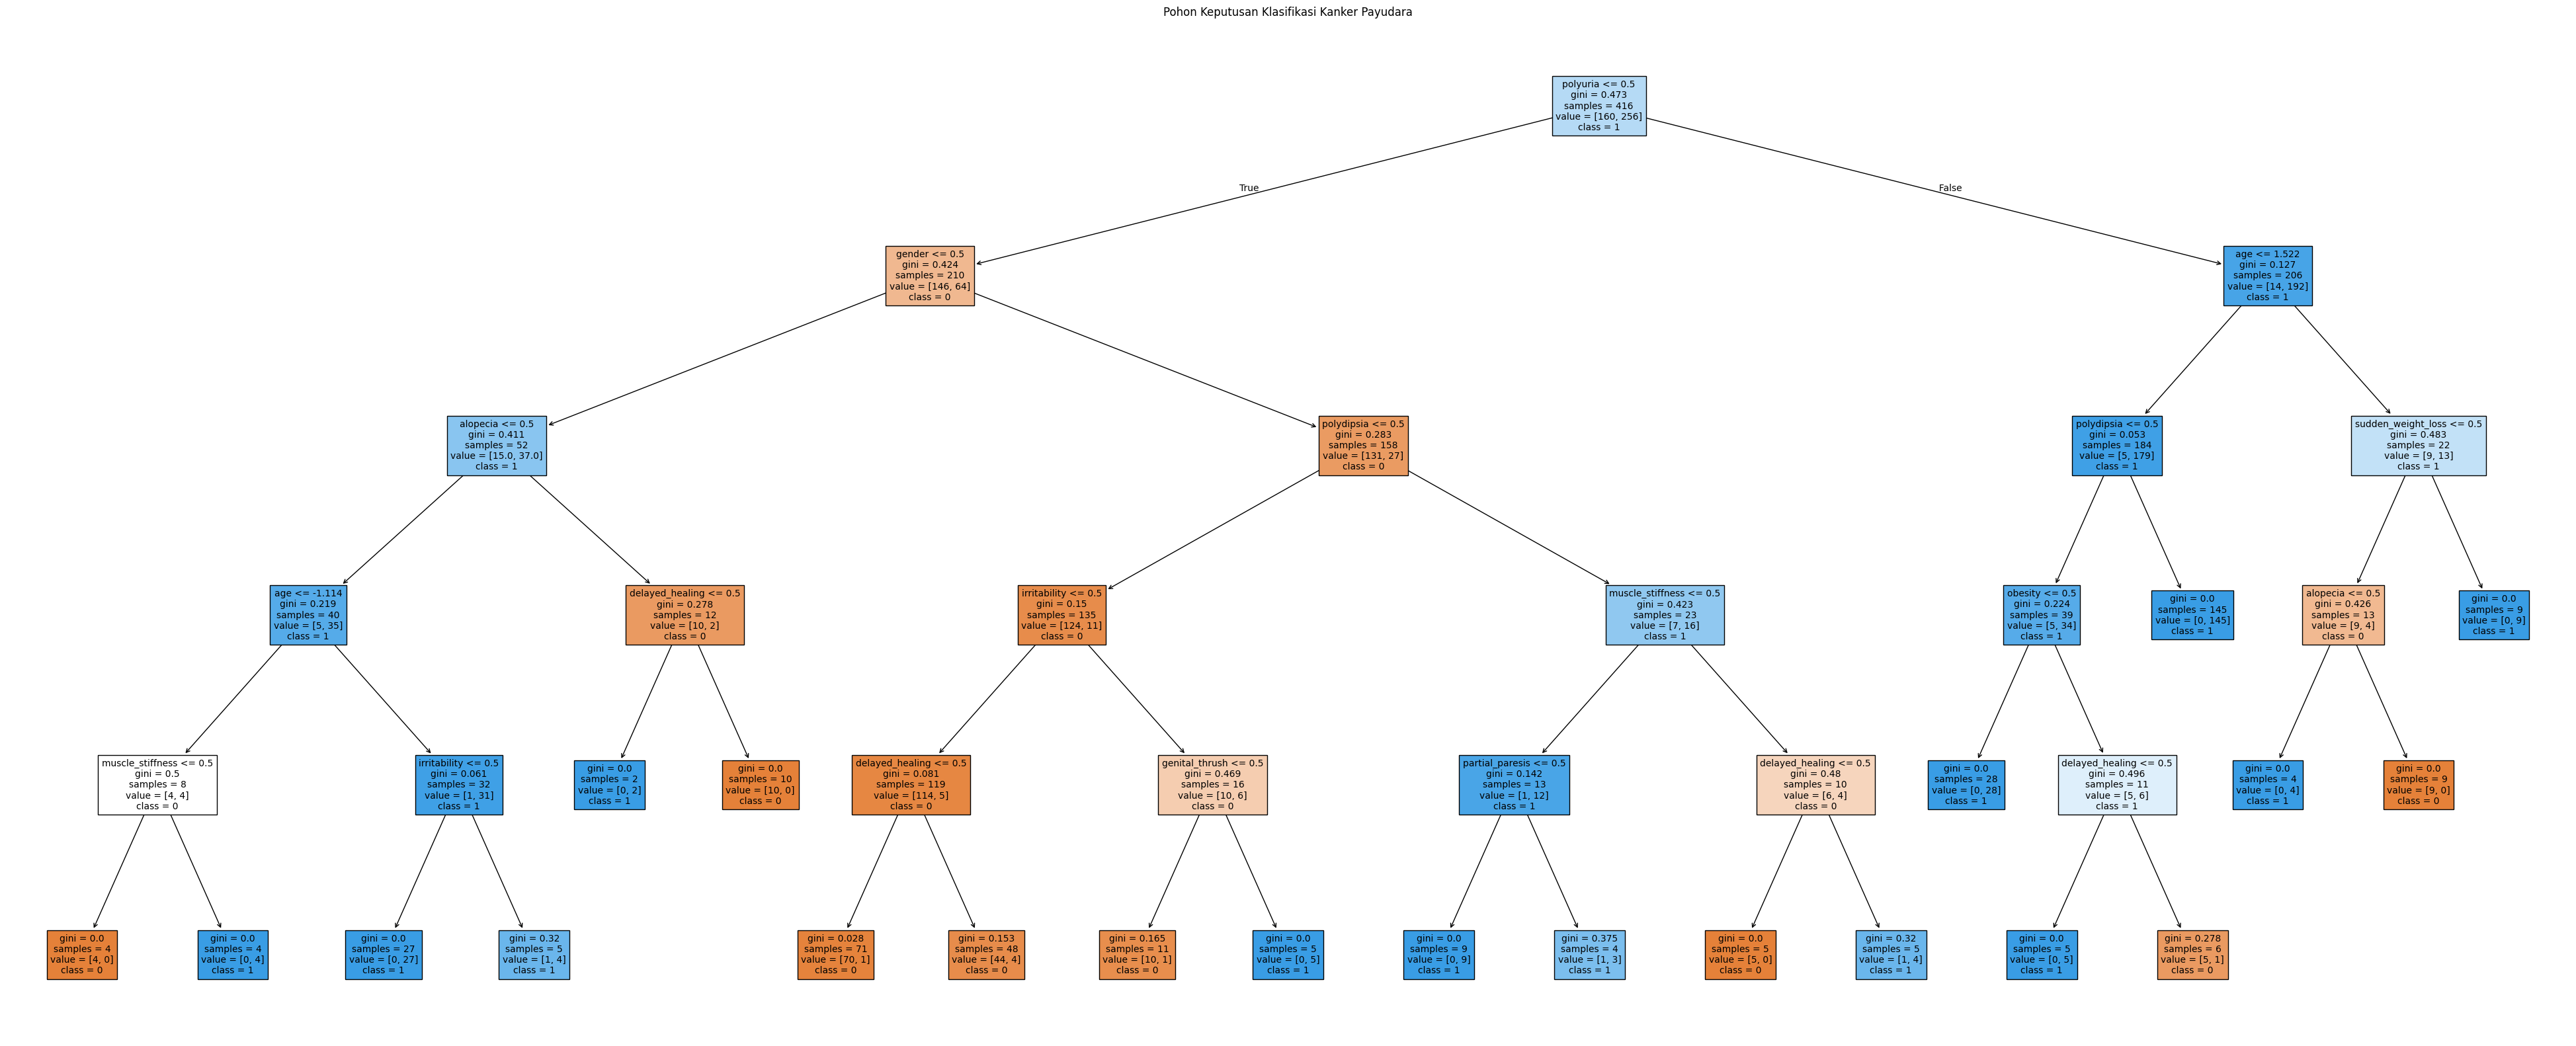

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 7. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Visualisasi Struktur Pohon ===
plt.figure(figsize=(50, 20))
plot_tree(clf, feature_names=X.columns, class_names=list(map(str, clf.classes_)), filled=True, fontsize=10)
plt.title("Pohon Keputusan Klasifikasi Kanker Payudara")
plt.show()

Akurasi: 0.9423076923076923

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



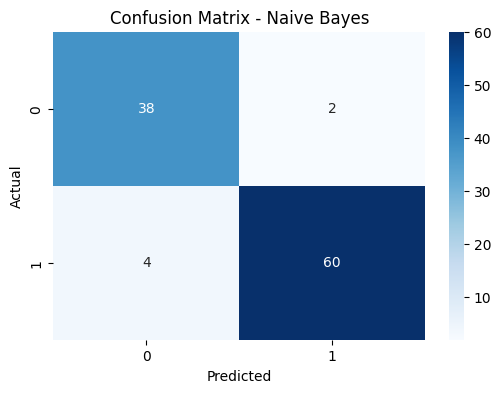

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model Naive Bayes ===
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# === 8. Evaluasi hasil prediksi ===
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=gnb.classes_, yticklabels=gnb.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


Akurasi: 0.9326923076923077

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.98      0.91      0.94        64

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



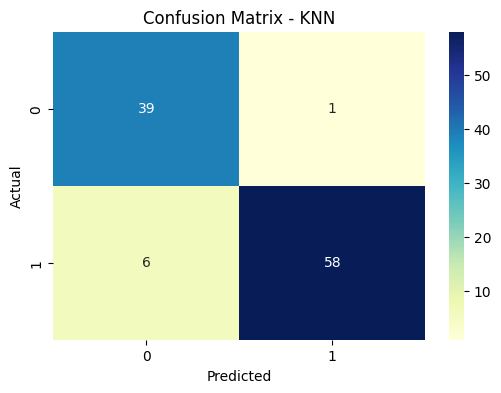

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)  # kamu bisa ubah k sesuai kebutuhan
knn.fit(X_train, y_train)

# === 8. Evaluasi ===
y_pred = knn.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=knn.classes_, yticklabels=knn.classes_, cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


# Evaluasi



Akurasi ketiga Model


| Model                | Accuracy (%) |
| :------------------- | :----------- |
| **Naive Bayes** | 94.23%    |
| **Decision Tree** | 98.07%       |
| **KNN** | 93.26%       |


* Berdasarkan ketiga model diatas, Decision Tree menunjukkan akurasi tertinggi di 98.07%.

# Deployment

In [36]:
import joblib

# === Simpan model ke file .pkl menggunakan joblib ===
joblib.dump(clf, 'model_decision_tree.pkl')

print("Model Decision Tree berhasil disimpan ke 'model_decision_tree.pkl'")

Model KNN berhasil disimpan ke 'model_decision_tree.pkl'
